In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

Query
Select max(date)
From Measurement

Select date, prcp
From Measurment
Where date >= year_before
Group By date


In [10]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()[0][0]

'2017-08-23'

In [11]:
session.query(func.max(Measurement.date)).first()[0]

'2017-08-23'

In [12]:
last_date_str = session.query(func.max(Measurement.date)).scalar()
last_date_str

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_date = dt.date.fromisoformat(last_date_str)
year_before = last_date - dt.timedelta(days=365)
year_before
# Perform a query to retrieve the date and precipitation scores from the last year (12months)
session.query(Measurement.date, func.avg(Measurement.prcp))\
    .filter(Measurement.date >= year_before)\
    .group_by(Measurement.date)\
    .order_by(Measurement.date)\
    .all()



[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

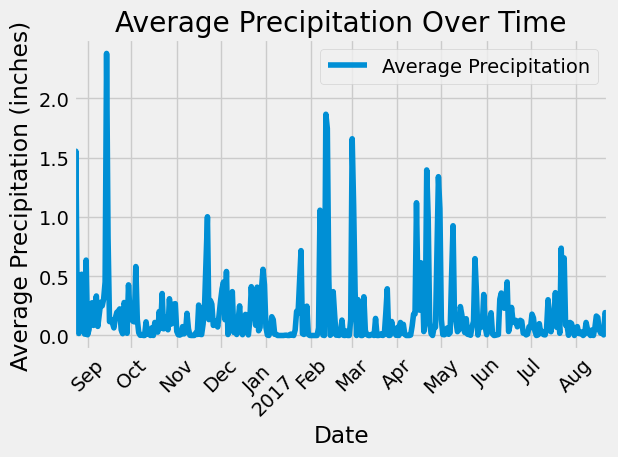

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data = session.query(Measurement.date, func.avg(Measurement.prcp))\
    .filter(Measurement.date >= year_before)\
    .group_by(Measurement.date)\
    .order_by(Measurement.date)\
    .all()
column_names = ['Date', 'Average Precipitation']
precipitation_df = pd.DataFrame(precipitation_data, columns=column_names)

# Sort the dataframe by date
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'])
precipitation_df = precipitation_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='Date', y='Average Precipitation', title='Average Precipitation Over Time', legend=True)
plt.xlabel('Date')
plt.ylabel('Average Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()
summary_statistics

,Date,Average Precipitation
count,366,366.000000
mean,2017-02-21 12:00:00,0.170757
min,2016-08-23 00:00:00,0.000000
25%,2016-11-22 06:00:00,0.008571
50%,2017-02-21 12:00:00,0.070000
75%,2017-05-23 18:00:00,0.191667
max,2017-08-23 00:00:00,2.380000
std,NaN,0.295683


# Exploratory Station Analysis

Query 
Select sum (station)
From Station

Select
From



In [16]:
# Design a query to calculate the total number of stations in the dataset (9)
session.query(func.count(Station.station)).scalar()

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Most Active Station (USC00519281) Temperature Statistics:
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66 °F


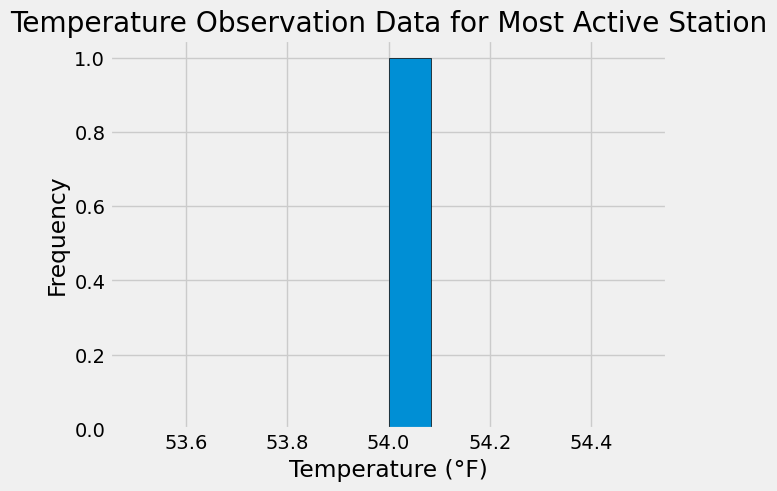

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = station_activity[0][0]
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station_id)\
    .all()

# Extract the lowest, highest, and average temperatures from the query results
lowest_temp = most_active_station[0][0]
highest_temp = most_active_station[0][1]
avg_temp = most_active_station[0][2]

print(f"Most Active Station ({most_active_station_id}) Temperature Statistics:")
print(f"Lowest Temperature: {lowest_temp} °F")
print(f"Highest Temperature: {highest_temp} °F")
print(f"Average Temperature: {avg_temp:.2f} °F")

# Plot the results as a histogram
plt.hist(temperature_data, bins=12, edgecolor='black')
plt.title('Temperature Observation Data for Most Active Station')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()